# 0. imports

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Understanding

A company is investing monthly in online advertising platforms such as YouTube, Facebook, and newspapers to prospect leads (individuals interested in its products). In order to track the performance of these investments, the company records all advertising expenses and all sales returns generated from these investments.

Assumptions

Identify possible inconsistencies
Determine which investment is more profitable
Identify if there are any temporary aspects
Build the forecasting model

In [178]:
df = pd.read_csv("MKT.csv")

In [179]:
df.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [180]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [181]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


## 1.1 Histogramas

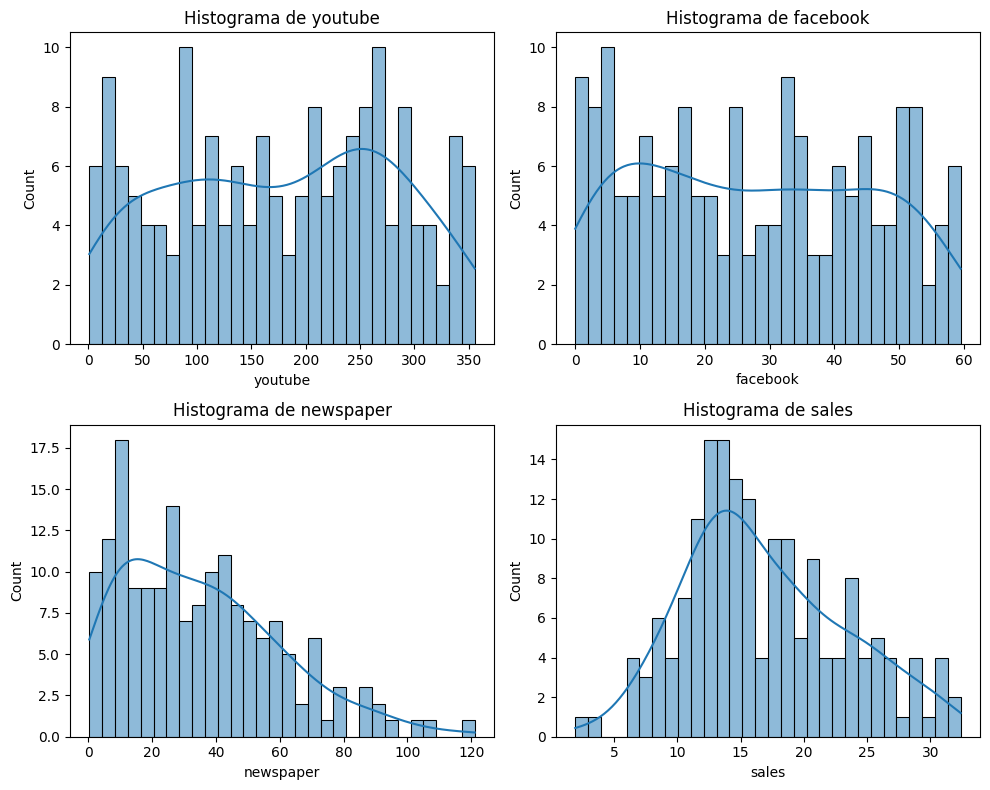

In [184]:
df_reset = df.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

variables = ['youtube', 'facebook', 'newspaper', 'sales']

for i, var in enumerate(variables):
    sns.histplot(data=df_reset, x=var, bins=30, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histograma de {var}')

plt.tight_layout()
plt.show()

## 1.2  stacked area Plot

A comparative chart for analyzing the relevance of columns and temporal significance.


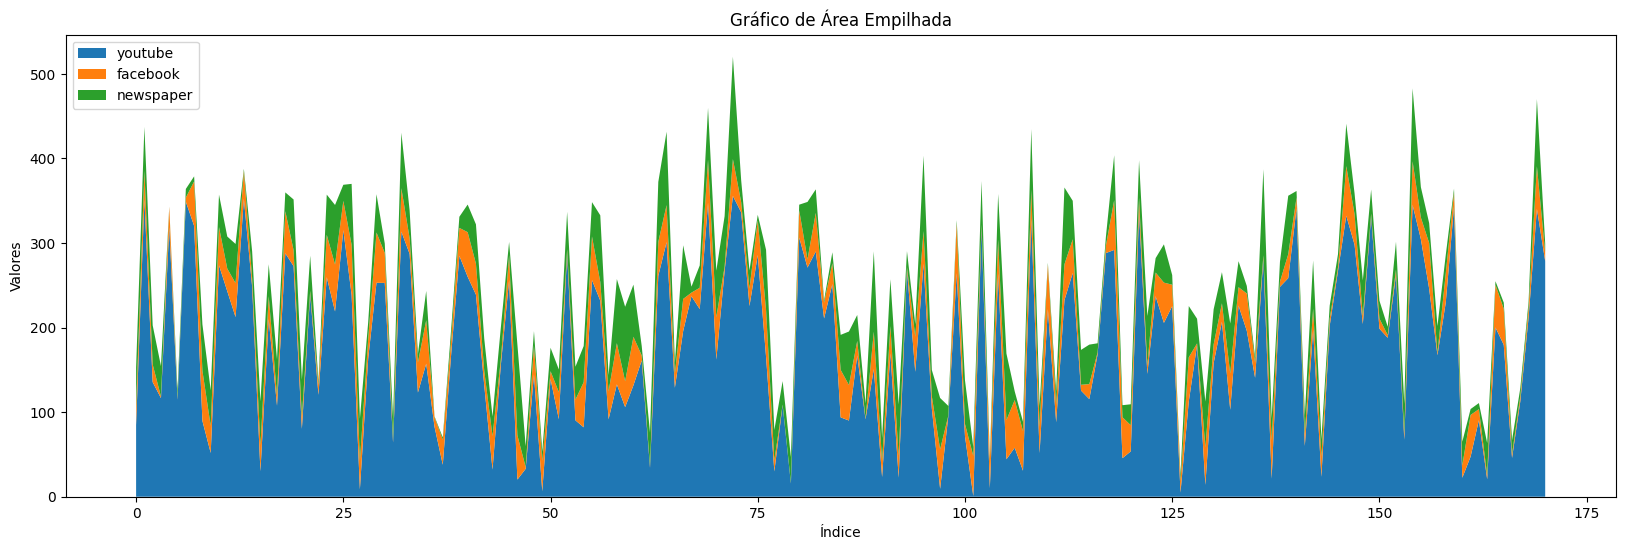

In [185]:
plt.figure(figsize=(20, 6))

# Variables for the stacked area chart
variables_stacks = ['youtube', 'facebook', 'newspaper']

# create the stacked area chart
plt.stackplot(df_reset.index, df_reset[variables_stacks].T, labels=variables_stacks)

# labels, title and plot
plt.title('Gráfico de Área Empilhada')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(loc='upper left')

plt.show()

As shown in the graph, there appears to be a significant predominance regarding the YouTube column and a quantitative randomness, indicating no temporal relevance.

## 1.3 correlation_matrix

In [186]:
correlation_matrix = df.corr()
print(correlation_matrix)

            youtube  facebook  newspaper     sales
youtube    1.000000  0.086538   0.110759  0.782030
facebook   0.086538  1.000000   0.293425  0.602918
newspaper  0.110759  0.293425   1.000000  0.254987
sales      0.782030  0.602918   0.254987  1.000000


As predicted in the stacked area chart, YouTube exhibits a predominant influence on relevance.

## 1.4 Boxplot
To detect outliers.

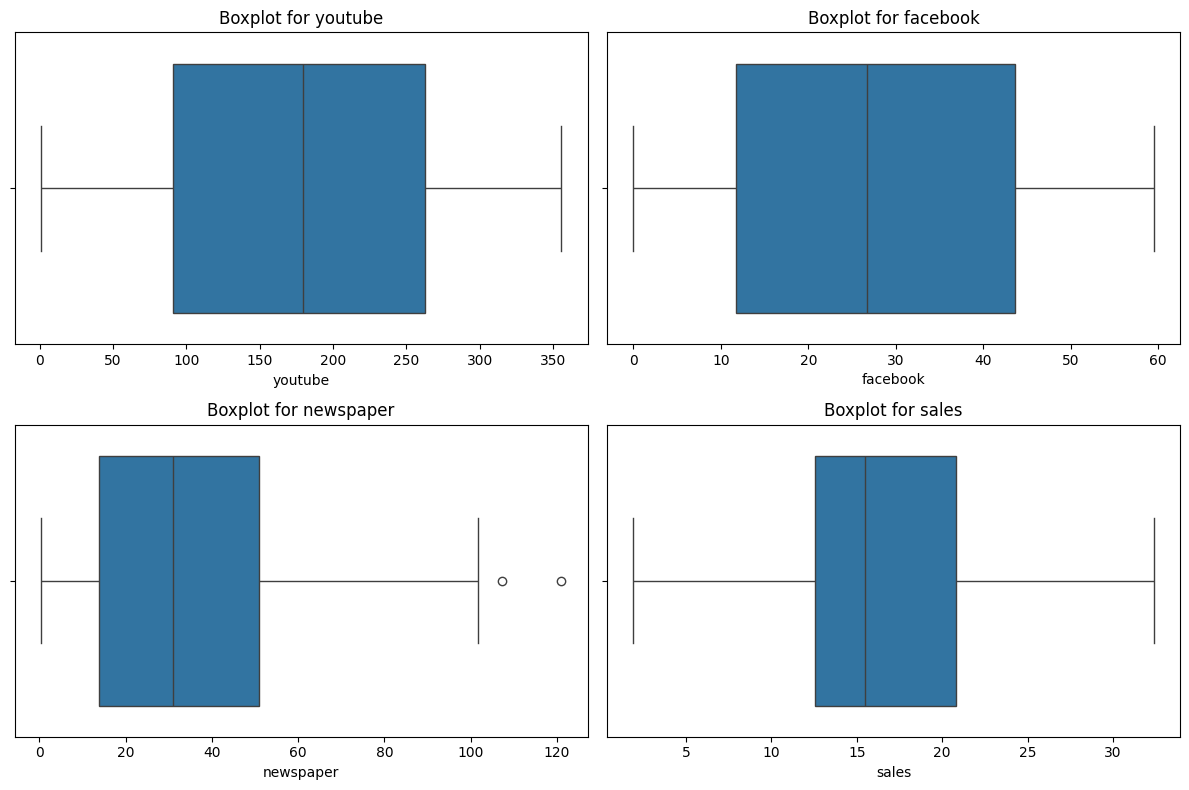

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables you want to analyze
variables = ['youtube', 'facebook', 'newspaper', 'sales']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate over variables and create boxplots
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[variable], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {variable}')

plt.tight_layout()
plt.show()


Presence of an outlier was detected in the newspaper chart.

# 2. Data Preparation

Filtering using standard deviation limit

In [188]:
print(df['newspaper'].isnull().sum())


0


In [189]:
#Remove values beyond 3 standard deviations
mean_value = df['newspaper'].mean()
std_dev = df['newspaper'].std()
upper_threshold = mean_value + 3 * std_dev
df_filtered = df[df['newspaper'] <= upper_threshold]


In [190]:
print(df_filtered['newspaper'])


0      48.96
1      51.84
2      46.32
3      36.00
4       0.36
       ...  
166    16.56
167     9.72
168     7.68
169    79.44
170    10.44
Name: newspaper, Length: 170, dtype: float64


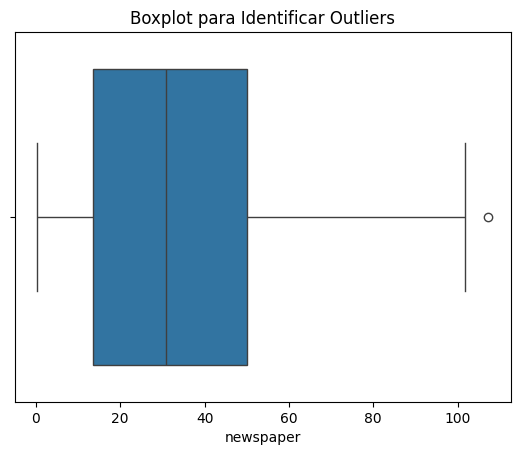

In [191]:
sns.boxplot(x=df_filtered['newspaper'])
plt.title('Boxplot para Identificar Outliers')
plt.show()

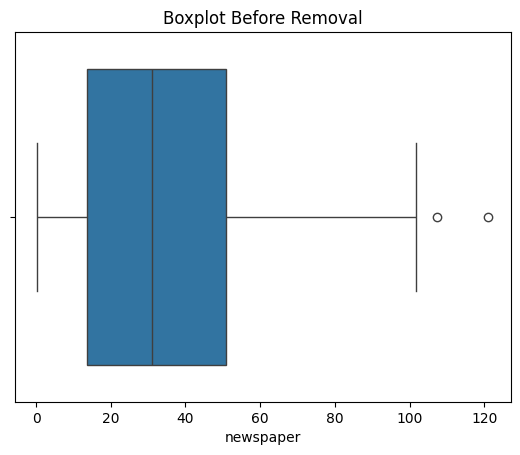

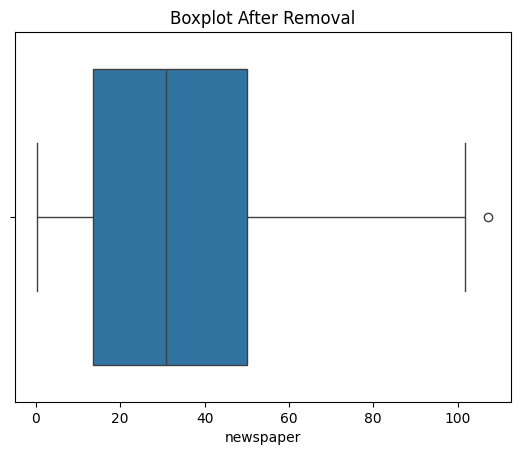

In [192]:
sns.boxplot(x=df['newspaper'])
plt.title('Boxplot Before Removal')
plt.show()

sns.boxplot(x=df_filtered['newspaper'])
plt.title('Boxplot After Removal')
plt.show()


## 2.2 winsorize method

In [193]:
from scipy.stats.mstats import winsorize

# Supposing you want to limit the values to 3 standard deviations
df['newspaper'] = winsorize(df['newspaper'], limits=(0, 0.05))


In [194]:
print(df['newspaper'])

0      48.96
1      51.84
2      46.32
3      36.00
4       0.36
       ...  
166    16.56
167     9.72
168     7.68
169    79.44
170    10.44
Name: newspaper, Length: 171, dtype: float64


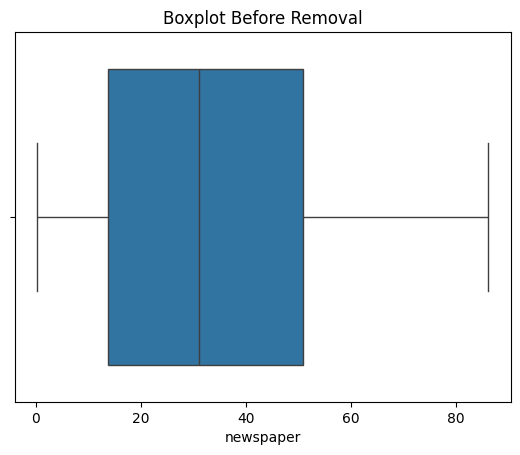

In [195]:
sns.boxplot(x=df['newspaper'])
plt.title('Boxplot Before Removal')
plt.show()

Using the Winsorize method, outliers were removed without the need for logarithmic transformations or other methods and with better precision.

# 3. modeling

In [196]:
X = df[['facebook', 'youtube', 'newspaper']]
y = df['sales']

### train split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### LinearRegression

In [198]:
regLinear = LinearRegression().fit(X_train, y_train)

In [199]:
y_pred_linear = regLinear.predict(X_test)

In [200]:
MSE_LRSK = mean_squared_error(y_test, y_pred_linear)

# 4. evaluation

In [201]:
print("MSE:",MSE_LRSK)
print("RMSE:",np.sqrt(MSE_LRSK))

MSE: 4.682436732964543
RMSE: 2.163893882094162


In [202]:
# Defina um limiar para classificar as previsões como sucesso ou falha
threshold = 2.0  # Exemplo de limiar, ajuste conforme necessário

# Converta as previsões contínuas em classes binárias
y_pred_binary = (y_pred_linear <= threshold).astype(int)
y_test_binary = (y_test <= threshold).astype(int)

# Calcule a acurácia
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy_binary:.2f}')


Accuracy: 0.98


### ultilizando Cross validation

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
import numpy as np

# Define your model and dataset
model_cross = LinearRegression()  # Create an instance of the model
X_cross = X  # Replace with your input data
y_cross = y  # Replace with your labels

# Choose the metric you want to evaluate
metric = make_scorer(mean_squared_error, greater_is_better=False)  # Use make_scorer with the desired metric

# Configure cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Number of folds (here, 5)

# Perform cross-validation and get the mean of the metrics
cross_val_results = cross_val_score(model_cross, X_cross, y_cross, cv=kf, scoring=metric)



In [204]:
# Display the results
print(f'Metrics per fold: {cross_val_results}')
print(f'Mean of the metrics: {cross_val_results.mean()}')

# Define a threshold to classify predictions as success or failure
threshold = 2.0  # Example threshold, adjust as needed

# Convert continuous predictions into binary classes
y_pred_binary = (y_pred_linear <= threshold).astype(int)
y_test_binary = (y_test <= threshold).astype(int)

# Calculate accuracy
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy_binary:.2f}')

mean_squared_error(y_test_binary, y_pred_binary)


Metrics per fold: [-5.5443788  -4.4611662  -2.97792844 -3.40000929 -4.9138764 ]
Mean of the metrics: -4.259471826273252
Accuracy: 0.98


0.019230769230769232

As it seems, the dataset is very simple, leading to high accuracy. Even when utilizing different methods, the accuracy remains consistent.